In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [5]:
folder = '../../results/'

figs = os.path.join(folder, 'figs')
file = os.path.join(folder, 'summarized-results.csv')

df = pd.read_csv(file)


category = 'INVO'
df_invo = df[df.Experiment == category]

### Normalize Colors

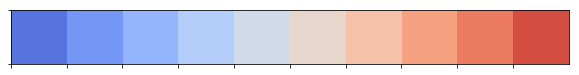

In [6]:
colors = sns.color_palette("coolwarm", 10)
sns.palplot(colors)

C:\Users\diego\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


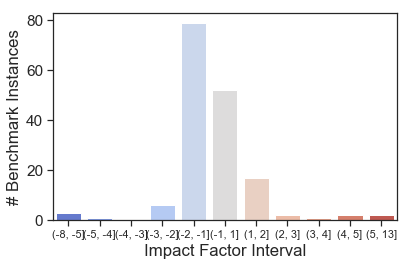

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
sns.set_style("ticks")
import math

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


clrs = 'seismic'
clrs = 'coolwarm'

def plot_binning_distro(df):   
    min_val = math.floor(df['New Factor'].min()) 
    max_val = int(df['New Factor'].max()) + 1  # 
    
    bins=[min_val,-5,-4,-3,-2,-1,1,2,3,4,5,max_val]
    
    binned_df = pd.cut(df['New Factor'], bins=bins).value_counts()
    # Sort first
    binned_df = binned_df.sort_index()
    
    ax = sns.barplot(x=binned_df.index, y=binned_df, palette=clrs)
    ax.set(xlabel='Impact Factor Interval', ylabel='# Benchmark Instances')

    new_intervals = binned_df.index
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(new_intervals))

    figname = 'distribution-impact-INVO.pdf'
    plt.xticks(fontsize=11)
    plt.savefig(os.path.join(figs, figname))
    #plt.clf()

plot_binning_distro(df_invo)

C:\Users\diego\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


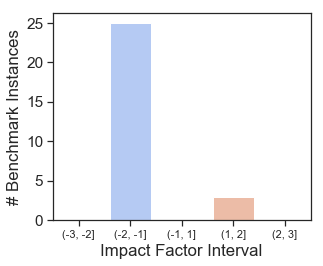

In [8]:
directly_affected = ['httpAddAllFast', 'http2AddAllFastest', 'http2AddAllFast', 'http2AddAllSlow']

directly = df_invo.query('Method in @directly_affected')

# Define bins manually
bins=[-3,-2,-1,1,2,3]

plt.figure(figsize=(len(bins) * .8,4)) 
plt.xticks(fontsize=11)

binned_df = pd.cut(directly['New Factor'], bins=bins).value_counts()
# Sort first
binned_df = binned_df.sort_index()


ax = sns.barplot(x=binned_df.index, y=binned_df, palette=clrs)
ax.set(xlabel='Impact Factor Interval', ylabel='# Benchmark Instances')

new_intervals = binned_df.index
ax.xaxis.set_major_formatter(ticker.FixedFormatter(new_intervals))

figname = 'distribution-impact-INVO-directly.pdf'
plt.tight_layout()
plt.savefig(os.path.join(figs, figname))
plt.show()

[(-5, -4], (-4, -3], (-3, -2], (-2, -1], (-1, 1], (1, 2], (2, 3], (3, 4], (4, 5], (5, 13]]
Categories (10, interval[int64]): [(-5, -4] < (-4, -3] < (-3, -2] < (-2, -1] ... (2, 3] < (3, 4] < (4, 5] < (5, 13]]


C:\Users\diego\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


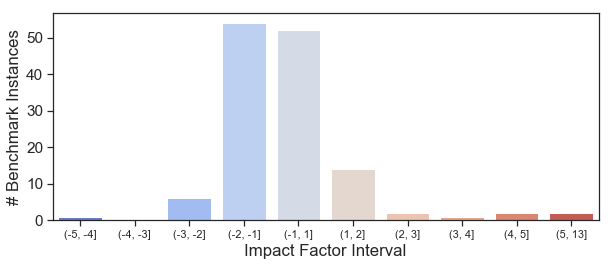

In [9]:
directly_affected = ['httpAddAllFast', 'http2AddAllFastest', 'http2AddAllFast', 'http2AddAllSlow']

indirectly = df_invo.query('Method not in @directly_affected')

# Define bins manually
bins = range(-5,6,1)
bins = bins=[-5,-4,-3,-2,-1,1,2,3,4,5,13]

plt.figure(figsize=(len(bins) * .8 ,4)) 
plt.xticks(fontsize=11)

binned_df = pd.cut(indirectly['New Factor'], bins=bins, precision=1).value_counts()
binned_df = binned_df.sort_index() 

ax = sns.barplot(x=binned_df.index, y=binned_df, palette=clrs)
ax.set(xlabel='Impact Factor Interval', ylabel='# Benchmark Instances')

new_intervals = binned_df.index.values
print(new_intervals)
ax.xaxis.set_major_formatter(ticker.FixedFormatter(new_intervals))

figname = 'distribution-impact-INVO-indirectly.pdf'
plt.tight_layout()
plt.savefig(os.path.join(figs, figname))
plt.show()

### Histogram

In [ ]:
indirectly = df_invo.query('Method not in @directly_affected')


sns.distplot(indirectly['New Factor'])


### Boxplot

In [ ]:
%matplotlib inline
sns.set(font_scale=1.4)
sns.set_style("ticks")
import math

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

clrs = 'seismic'
clrs = 'coolwarm'
clrs = 'Reds'

def scatterplot(df):
    
    ax = sns.scatterplot(data=df, x='Method', y='New Factor')
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.set(xlabel='Benchmark Test', ylabel='Impact Factor', title=df.name)
    
    figname = 'impact-%s-%s.pdf' % (df.name, category)
    plt.savefig(os.path.join(figs, figname))
    plt.show()

df_invo.groupby(by='Project').apply(scatterplot)

In [ ]:
headers_bench = df_invo[df_invo['Class'] == 'HeadersBenchmark']

ax = sns.scatterplot(data=headers_bench, x='Method', y='New Factor')
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.set(xlabel='Benchmark Test', ylabel='Impact Factor')

In [ ]:
codec = df_invo[df_invo['Class'] == 'CodecOutputListBenchmark']

ax = sns.scatterplot(data=codec, x='Method', y='New Factor')
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.set(xlabel='Benchmark Test', ylabel='Impact Factor')

### Generate Table

In [ ]:

def analyze_bench_test(test):
    impacted = len(test[test['New Factor'] != 0])
    total = len(test)

    return pd.Series({'Impacted': impacted, 'Total':total})
    
def analyze_project(proj):
    
    result = proj.groupby(by=['Class','Method']).apply(analyze_bench_test)
    
    versions_impacted = result['Impacted'].sum()
    total_versions = result['Total'].sum()
    
    bench_impacted = len(result[result['Impacted'] > 0])
    total_bench = len(result)
    
    return pd.Series({'Bench Impacted': bench_impacted, 'Total Bench': total_bench, 
                      '% Bench': bench_impacted / total_bench * 100,
        'Versions Impacted': versions_impacted, 'Total Versions': total_versions,
                     '% Version': versions_impacted / total_versions * 100})





table = df_invo.groupby(by='Project').apply(analyze_project)

table = table[['Bench Impacted', 'Total Bench', '% Bench', 'Versions Impacted', 'Total Versions','% Version']]
print(table.to_latex())


In [ ]:
table.sum(numeric_only=True)